In [2]:
from mixed_state.qcircuit import *
from mixed_state.utils import get_zero_state, getreal_denmat, getreal_vector
import qiskit

In [3]:
num_to_mix = 3
system_size = 2

In [4]:
zero_state = get_zero_state(system_size)
input_state = list()
angle = np.random.randint(1, 10, size=[num_to_mix, system_size, 3])
for i in range(num_to_mix):
    matrix = Identity(system_size)
    for j in range(system_size):
        row_i_mat = np.matmul(
            Z_Rotation(system_size, j, np.pi * angle[i][j][2], False),
            np.matmul(
                Y_Rotation(system_size, j, np.pi * angle[i][j][1], False),
                X_Rotation(system_size, j, np.pi * angle[i][j][0], False)))
        matrix = np.matmul(row_i_mat, matrix)
    state = np.matmul(matrix, zero_state)
    input_state.append(np.asmatrix(state))

while True:
    prob_real = np.random.dirichlet(np.ones(num_to_mix)).tolist()
    real_state = getreal_denmat(system_size, num_to_mix, prob_real, input_state)
    if (qiskit.quantum_info.purity(real_state) < 0.9999):
        break

[[ 9.40509997e-16-2.22044605e-16j]
 [-4.93038066e-32-2.08835171e-31j]
 [-1.00000000e+00+1.83697020e-16j]
 [ 4.07889322e-32+2.22044605e-16j]]
...
[[-2.06449441e-31-1.33779584e-31j]
 [-2.35127499e-16-4.99600361e-16j]
 [ 3.78431522e-16-2.35127499e-16j]
 [ 1.00000000e+00-4.89858720e-16j]]
...
[[-4.17670341e-31+3.32073328e-31j]
 [ 4.99600361e-16-2.35127499e-16j]
 [ 2.22044605e-16+9.40509997e-16j]
 [-7.96020419e-16-1.00000000e+00j]]
...


In [21]:
real_state2.conjugate().transpose()

(1, 4)

In [25]:
real_state2 = getreal_vector(system_size, num_to_mix, prob_real, input_state)
a = (real_state2 @ real_state2.conjugate().transpose())

In [24]:
real_state

matrix([[ 4.33961693e-31+0.00000000e+00j,
         -5.42932586e-47+9.82117982e-47j,
         -4.37050586e-16+1.03183087e-16j,
         -1.69680342e-31-2.50589986e-31j],
        [-5.42932586e-47-9.82117982e-47j,
          1.63206617e-31+0.00000000e+00j,
         -1.86637109e-33-1.13913527e-31j,
          9.85330832e-18+2.09363703e-17j],
        [-4.37050586e-16-1.03183087e-16j,
         -1.86637109e-33+1.13913527e-31j,
          4.64695311e-01+0.00000000e+00j,
         -1.78077558e-16+1.09260600e-16j],
        [-1.69680342e-31+2.50589986e-31j,
          9.85330832e-18-2.09363703e-17j,
         -1.78077558e-16-1.09260600e-16j,
          5.35304689e-01+0.00000000e+00j]])

In [26]:
qiskit.quantum_info.purity(a)

QiskitError: 'Input quantum state is not a valid'

In [12]:
4138 * 8

33104

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


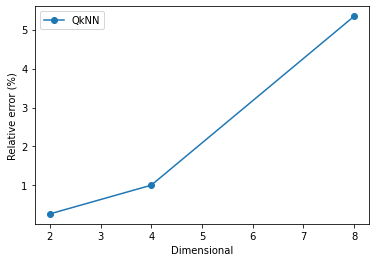

In [16]:
from matplotlib import pyplot as plt
import numpy as np
x = [2, 4, 8]
y1 = [0.27040076, 1.007444332, 5.341749829]
plt.plot(x, y1, marker='o', label = 'QkNN')
plt.xlabel('Dimensional')
# plt.xticks(np.arange(min(x) - 1, max(x) + 5, 1))
# plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Relative error (%)')
plt.legend()
plt.savefig('error.eps', format='eps', dpi=600)

In [16]:
import sklearn

def bench_mark(ground_truth, predict):
    """Return predict labels QKNN algorithm
    Args:
        - ground_truth (numpy array 1D): truth labels
        - predict (numpy array 1D): predict labels
    Returns:
        - Tuple: benchmark on classifer problem
    """
    accuracy = sklearn.metrics.accuracy_score(ground_truth, predict)
    precision = sklearn.metrics.precision_score(ground_truth, predict, average="weighted")
    recall = sklearn.metrics.recall_score(ground_truth, predict, average="weighted")
    f1 = sklearn.metrics.f1_score(ground_truth, predict, average="micro")
    matrix = sklearn.metrics.confusion_matrix(ground_truth, predict)
    return accuracy, precision, recall, matrix

predict_labels = [0, 2, 0, 2, 2, 2, 2, 0, 0]

test_labels = [1, 0, 0, 1, 1, 2, 2, 1, 2]

accuracy, precision, recall, matrix = bench_mark(predict_labels, test_labels)
print('Predict labels: ', predict_labels)
print('Test labels: ', test_labels)
print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('matrix: ', matrix)

Predict labels:  [0, 2, 0, 2, 2, 2, 2, 0, 0]
Test labels:  [1, 0, 0, 1, 1, 2, 2, 1, 2]
accuracy:  0.3333333333333333
precision:  0.5925925925925926
recall:  0.3333333333333333
matrix:  [[1 2 1]
 [0 0 0]
 [1 2 2]]


C:\Users\haime\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from qiskit import *
from qiskit.quantum_info.states.utils import partial_trace
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

sim =  Aer.get_backend('statevector_simulator')
res = execute(qc, sim, shots=1).result()
state_vec = res.get_statevector()

# Remove qubit zero
partial_trace(state_vec, [0])

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))

In [1]:
import qiskit
import numpy as np
import qtm.nqubit, qtm.custom_gate

In [2]:
random_sv = qiskit.quantum_info.random_statevector(8)

In [26]:
qc = qiskit.QuantumCircuit(3)
qc.initialize(random_sv.data, [0, 1, 2])
qc = qtm.nqubit.create_Wchainchecker_haar(qc, thetas, num_layers)
# qc.draw('mpl')
state = (qiskit.quantum_info.Statevector.from_instruction(qc))
qiskit.quantum_info.purity(state)

1.0

In [27]:

num_layers = 1
num_qubits = 3
thetas = np.ones(num_layers*num_qubits*4)
qc = qiskit.QuantumCircuit(num_qubits)
qc.initialize(random_sv.data, [0, 1, 2])

loss_values = []
thetass = []

for i in range(0, 200):
    if i % 2 == 0:
        print('W_chain: (' + str(num_layers) + ',' + str(num_qubits) + '): ' + str(i))
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_Wchainchecker_haar,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers)
    print(grad_loss)
    thetas -= qtm.constant.learning_rate*(grad_loss) 
    thetass.append(thetas.copy())
    qc_copy = qtm.nqubit.create_Wchainchecker_haar(qc.copy(), thetas, num_layers)  
    loss = qtm.base.loss_basis(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)

W_chain: (1,3): 0
[ 0.04335  0.02645  0.01295 -0.04405 -0.0601   0.01255  0.01165  0.039
 -0.0965  -0.00075 -0.0015   0.0008 ]
[ 0.0426   0.02395  0.0132  -0.04135 -0.0618   0.0114   0.01455  0.0392
 -0.0987   0.0002   0.0009   0.00265]
W_chain: (1,3): 2
[ 0.04485  0.02395  0.01445 -0.04435 -0.06375  0.00985  0.01545  0.04555
 -0.10255  0.0008   0.0023   0.00085]
[ 0.04575  0.0237   0.01865 -0.0445  -0.0645   0.0088   0.01285  0.04545
 -0.10495 -0.00115 -0.00105 -0.00215]
W_chain: (1,3): 4
[ 0.0472   0.02785  0.0164  -0.049   -0.0625   0.0082   0.0151   0.04595
 -0.10915 -0.00115 -0.0016  -0.0016 ]
[ 0.0535   0.02275  0.0189  -0.0493  -0.0601   0.0085   0.017    0.04555
 -0.11145 -0.0013  -0.00155  0.00105]
W_chain: (1,3): 6
[ 0.0522   0.0243   0.0192  -0.05    -0.0679   0.00485  0.01405  0.05375
 -0.11275 -0.0012   0.00335 -0.00105]
[ 0.05305  0.0289   0.0192  -0.05535 -0.0613   0.00475  0.01505  0.048
 -0.11505 -0.0014  -0.00175  0.0033 ]
W_chain: (1,3): 8
[ 0.05395  0.03065  0.0199 

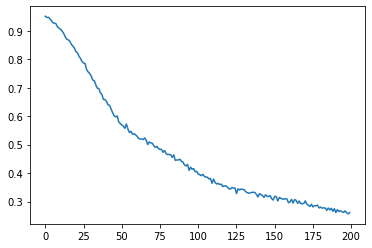

In [28]:
from matplotlib import pyplot as plt
plt.plot(loss_values)